#Tokenization and Text Cleaning

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# Sample text
sample_text = """
Natural language processing (NLP) is a field of artificial intelligence (AI) that deals with the interaction between computers and humans using natural language. It enables computers to understand, interpret, and generate human language in a way that is both meaningful and useful.
"""

#Visualization of Word Frequency

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def plot_word_frequency(text):
    tokens = preprocess_text(text)
    word_freq = Counter(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    print(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Counter({'language': 3, 'natural': 2, 'computer': 2, 'human': 2, 'processing': 1, 'nlp': 1, 'field': 1, 'artificial': 1, 'intelligence': 1, 'ai': 1, 'deal': 1, 'interaction': 1, 'using': 1, 'enables': 1, 'understand': 1, 'interpret': 1, 'generate': 1, 'way': 1, 'meaningful': 1, 'useful': 1})


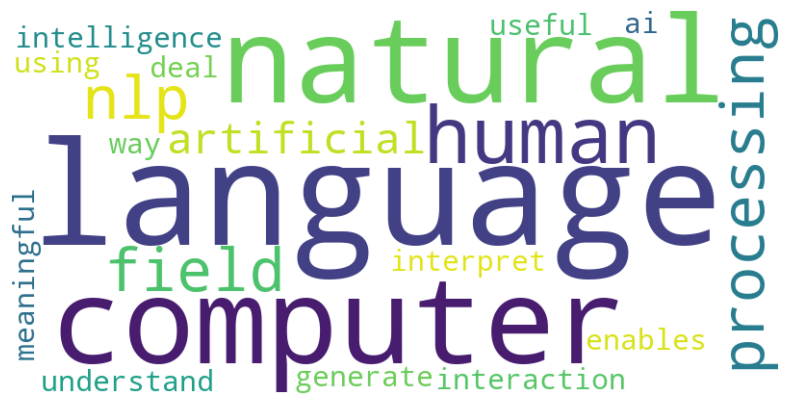

In [12]:
plot_word_frequency(sample_text)

#Bigrams and Trigrams

In [16]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

def plot_collocations(text):
    tokens = preprocess_text(text)

    # Bigrams
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_measures = BigramAssocMeasures()
    bigram_freq = bigram_finder.nbest(bigram_measures.pmi, 10)
    bigram_freq = [' '.join(bigram) for bigram in bigram_freq]

    # Print and plot bigrams
    print("Top Bigrams:")
    for bigram in bigram_freq:
        print(bigram)

    # Trigrams
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_measures = TrigramAssocMeasures()
    trigram_freq = trigram_finder.nbest(trigram_measures.pmi, 10)
    trigram_freq = [' '.join(trigram) for trigram in trigram_freq]

    # Print and plot trigrams
    print("\nTop Trigrams:")
    for trigram in trigram_freq:
        print(trigram)

    # Combine bigrams and trigrams for visualization
    collocations = bigram_freq + trigram_freq

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(collocations))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Top Bigrams:
ai deal
artificial intelligence
deal interaction
field artificial
intelligence ai
interpret generate
meaningful useful
nlp field
processing nlp
understand interpret

Top Trigrams:
ai deal interaction
artificial intelligence ai
field artificial intelligence
intelligence ai deal
nlp field artificial
processing nlp field
understand interpret generate
way meaningful useful
computer understand interpret
deal interaction computer


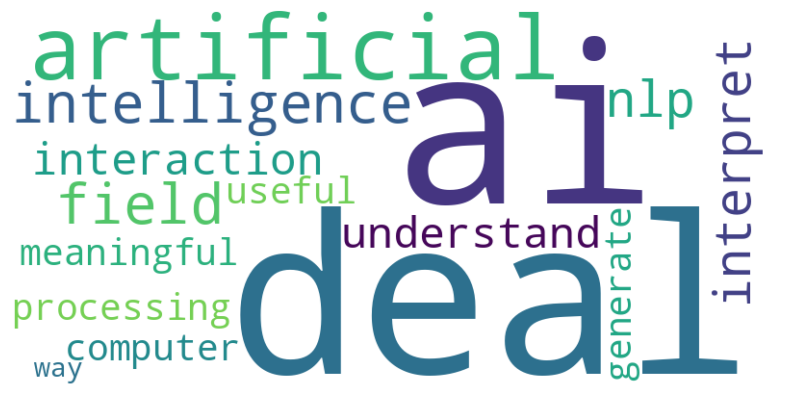

In [17]:
plot_collocations(sample_text)